$$
\frac{\mathrm{d} R_\alpha}{\mathrm{d} t} = h_\alpha(R_\alpha) - R_\alpha \sum_i C^{(1)}_{i\alpha}S_i^{(1)}
$$

$$
\frac{\mathrm{d} S_i^{(1)}}{\mathrm{d} t} = S_i^{(1)} (\sum_\alpha G^{(1)}_{i\alpha}R_\alpha - \sum_j C^{(2)}_{ji}S_j^{(2)} - \delta_i^{(1)})
$$

$$
\frac{\mathrm{d} S_i^{(2)}}{\mathrm{d} t} = S_i^{(2)} (\sum_j G^{(2)}_{ij}S_j^{(1)} - \delta_i^{(2)})
$$

$$
\begin{bmatrix}
0 & D(S^{(2)})G^{(2)} & 0\\
-D(S^{(1)})C^{(2)\top} & 0 & D(S^{(1)})G^{(1)}\\
0 & -D(R)C^{(1)\top} & \frac{\partial h}{\partial R} - D(C^{(1)\top}S^{(1)})
\end{bmatrix}
$$

$$
\begin{bmatrix}
0 & G^{(2)} & 0\\
-C^{(2)\top} & 0 & G^{(1)}\\
0 & -C^{(1)\top} & \frac{\partial h}{\partial R} - D(C^{(1)\top}S^{(1)})
\end{bmatrix}
$$

$$
\begin{bmatrix}
0 & G^{(2)} & 0\\
-C^{(2)\top} & 0 & G^{(1)}\\
0 & -C^{(1)\top} & -\ddots
\end{bmatrix}
$$

First have a look of what is the eigenvalue spectrum. If does not work, try to add self-regulation the layer $1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Trial ended, try phase diagram

In [2]:
def sample(rho, M, N1, N2, a0 = 1.0, a1 = 1.0, a2 = 1.0):
    Tgc = np.random.randn(2, N1, M)

    G1 = Tgc[0]
    C1 = rho * Tgc[0] + np.sqrt(1-rho**2) * Tgc[1]
    G1 = (G1 + 3.0)/M
    C1 = (C1 + 3.0)/M

    Tgc = np.random.randn(2, N2, N1)

    G2 = Tgc[0]
    C2 = rho * Tgc[0] + np.sqrt(1-rho**2) * Tgc[1]
    G2 = (G2 + 3.0)/N1
    C2 = (C2 + 3.0)/N1

    J = np.zeros((M+N1+N2,M+N1+N2))
    J[0:N2,N2:N2+N1] = G2
    J[N2:N2+N1,0:N2] = -C2.T
    J[N2:N2+N1,N2+N1:] = G1
    J[N2+N1:,N2:N2+N1] = - C1.T
    J[N2+N1:,N2+N1:] = - np.eye(M) * a0
    J[N2:N2+N1,N2:N2+N1] = - np.eye(N1) * a1
    J[:N2,:N2] = - np.eye(N2) * a2
    E_J = np.linalg.eigvals(J)
    NU_J = len(E_J[E_J.real >= 1.0e-8])
    
    return NU_J

x-axis being $N_1/M$, and y-axis being $N_2/N_1$.

In [3]:
rho = .8
N1 = 32
M_span = range(1,65)
N2_span = range(1,65)

NU = np.zeros((len(M_span), len(N2_span), 10))
for i in range(len(M_span)):
    M = M_span[i]
    for j in range(len(N2_span)):
        N2 = N2_span[j]
        # each point sample 10 communities
        for k in range(0,10):
            NU[i,j,k] = sample(rho, M, N1, N2, a0 = 0, a2=0)

NU_mean = np.mean(NU, -1)
FNC = np.mean((NU > 0).astype(float), -1)

In [4]:
NU_draw = np.zeros(np.shape(NU_mean))
FNC_draw = np.zeros(np.shape(NU_mean))
for j in range(64):
    NU_draw[:,j] = NU_mean[:,64-j-1]
    FNC_draw[:,j] = FNC[:,64-j-1]

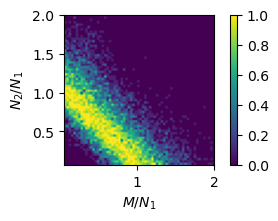

In [5]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
extent = 1/16, 2, 1/16, 2
plt.imshow(FNC_draw.T, extent=extent, aspect=1)
plt.colorbar()

plt.xlabel(r'$M/N_1$')
plt.ylabel(r'$N_2/N_1$')
plt.savefig('./3layers-5.pdf')

only Layer 1 has auto-regulation, as expected